In [ ]:
1) Importing the necessary libraries and loading the dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Data - Parkinsons .csv')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
i)It can be seen that this data makes use of the frequency and amplitude variations present in the voice of each person in order to detect the presence or absence of Parkinson's Disease.
ii) It may not be easy to track the relevant and irrelevant features since each variation recorded could be fundamental to the detection of the disease.


In [ ]:
2) Obtaining the shape and checking for the presence of null values and the type of each column data.

In [3]:
print('Data Shape\n',data.shape)
print('Checking for missing values\n',data.isnull().any())
print('Finding the type of data in each column\n',data.dtypes)

Data Shape
 (195, 24)
Checking for missing values
 name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool
Finding the type of data in each column
 name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        

In [ ]:
Obtaining the numerical information from the data:

In [617]:
x=data.drop(columns=['name'])
x.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
3)Obtaining a pair plot in order to visualize a general overview of the relation between the different variables.

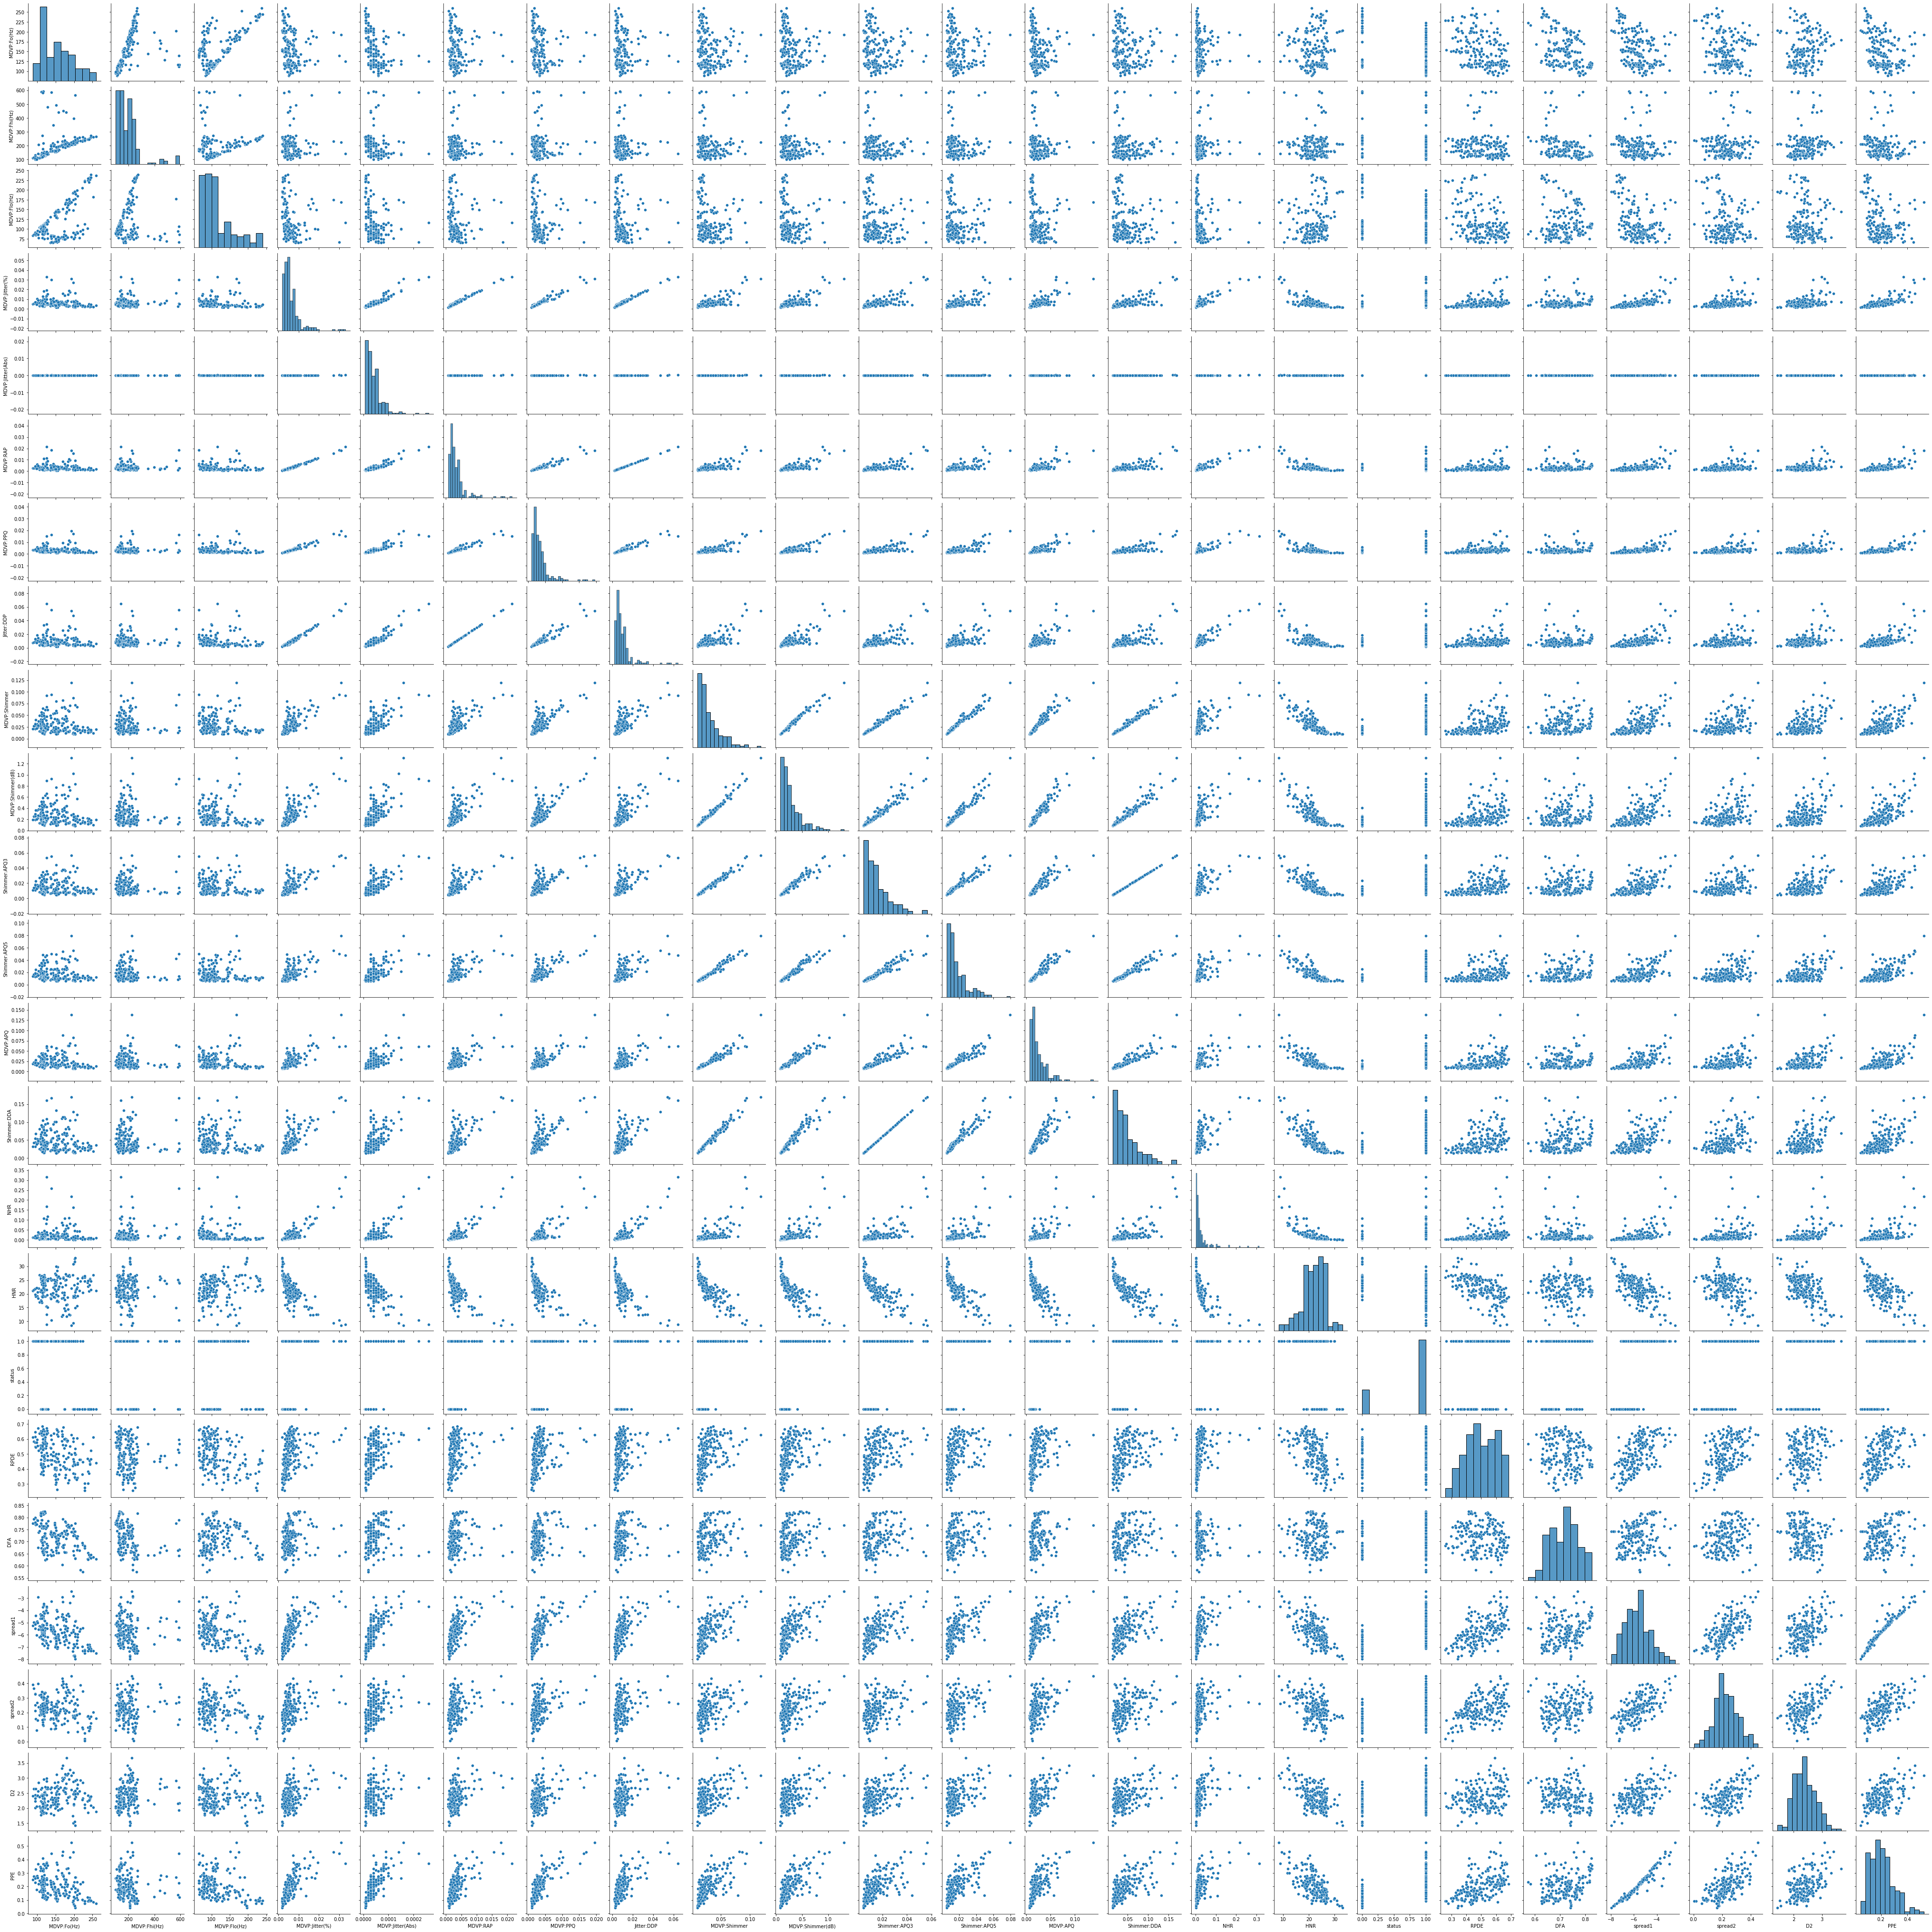

In [5]:
sns.pairplot(data)

In [ ]:
From the pairplot, it can be seen that several variables are linearly related which is expected since several variables such as MDVP Jitter,Shimmer.for example, are present in different variations and are thus expected to be correlated with each other.

In [ ]:
Checking the count of those with and without Parkinsons Disease:

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


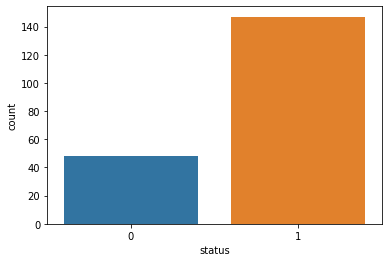

In [616]:
sns.countplot(data['status'])

In [ ]:
Majority of the participants are found to be affected by Parkinson's Disease.

In [ ]:
4) Checking for skewness of data:

In [442]:
x=data.drop(columns=['name'])
x.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [ ]:
The analysis above indicates that the distribution of most of the columns is left skewed.

MDVP:Fo(Hz)


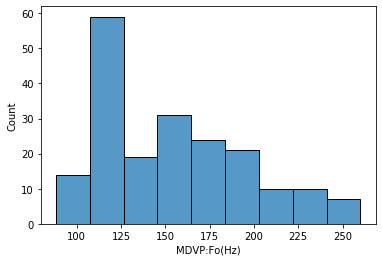

MDVP:Fhi(Hz)


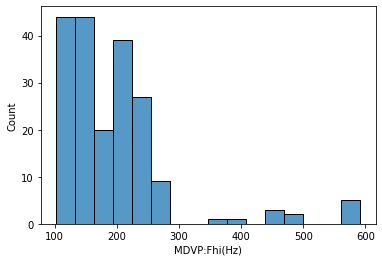

MDVP:Flo(Hz)


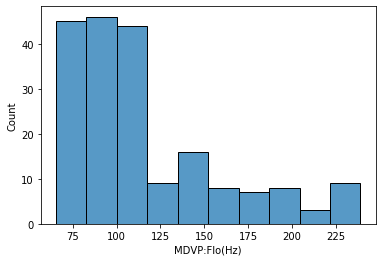

MDVP:Jitter(%)


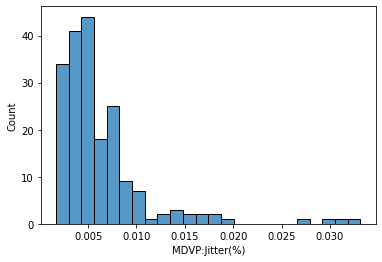

MDVP:Jitter(Abs)


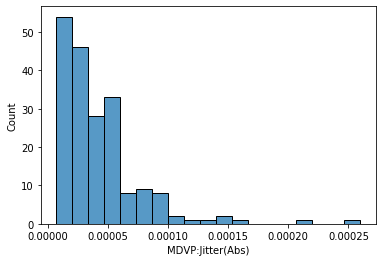

MDVP:RAP


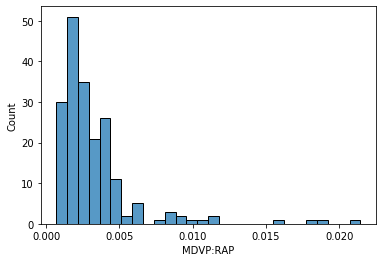

MDVP:PPQ


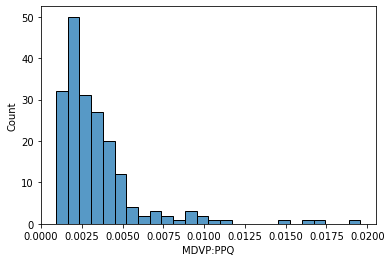

Jitter:DDP


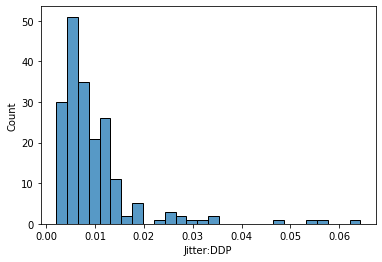

MDVP:Shimmer


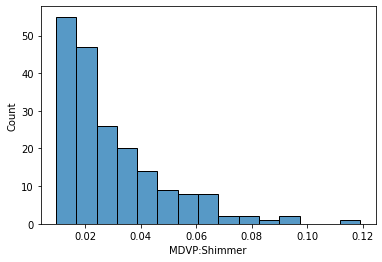

MDVP:Shimmer(dB)


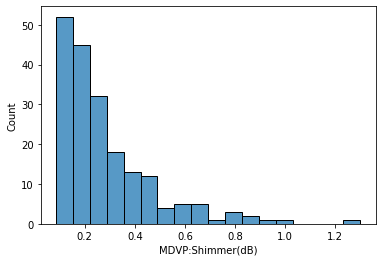

Shimmer:APQ3


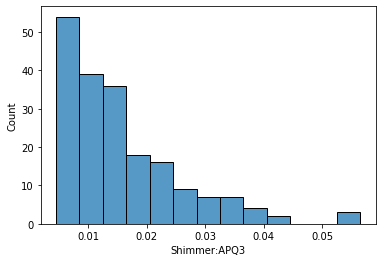

Shimmer:APQ5


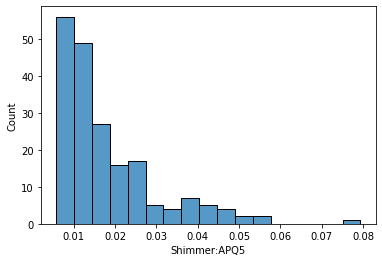

MDVP:APQ


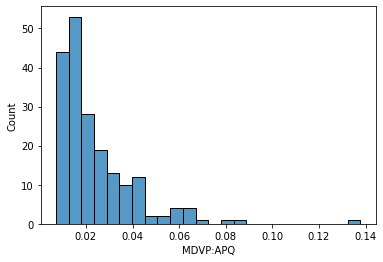

Shimmer:DDA


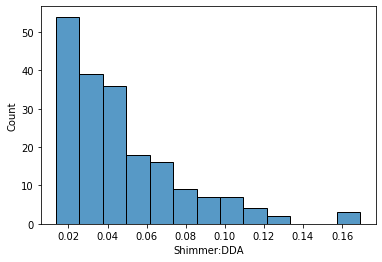

NHR


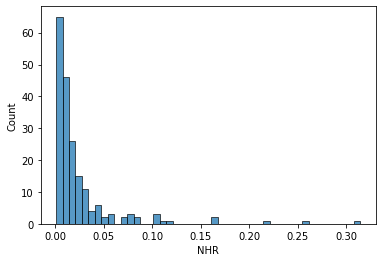

HNR


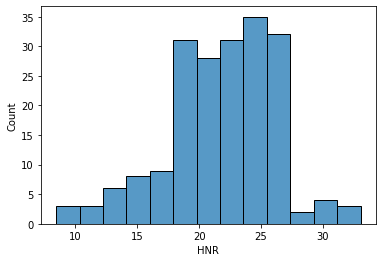

status


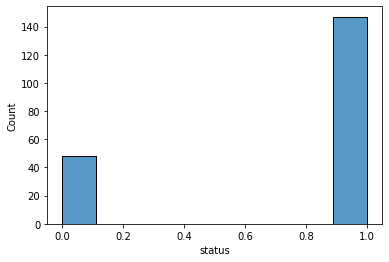

RPDE


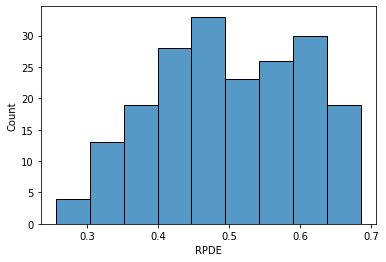

DFA


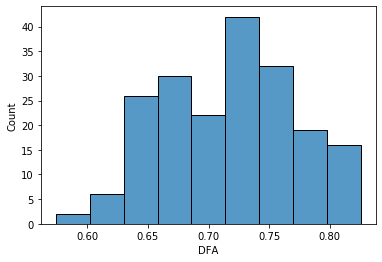

spread1


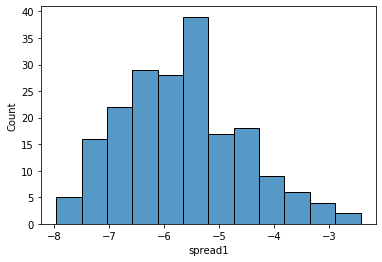

spread2


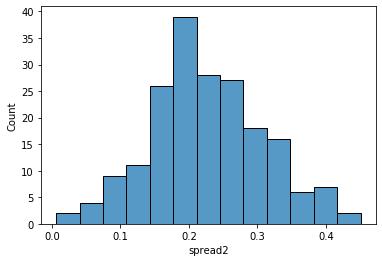

D2


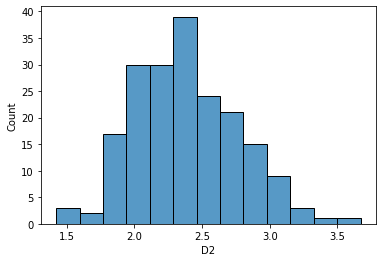

PPE


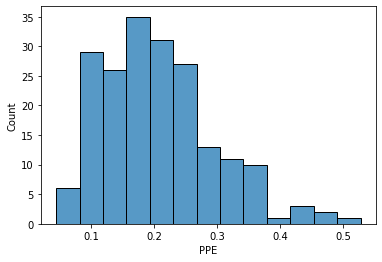

In [430]:

cols=x.columns
for col in cols:
    print(col)
    sns.histplot(data[col])
    plt.show()

In [ ]:
Analyzing the data on the basis of the presence or absence of Parkinson's Disease:

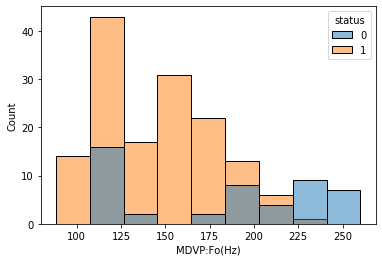

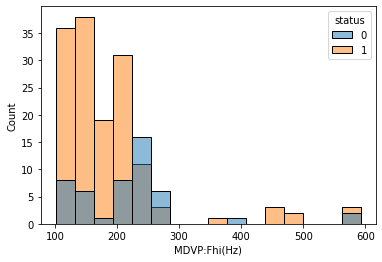

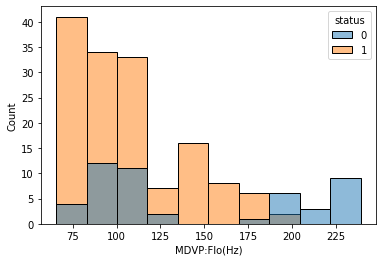

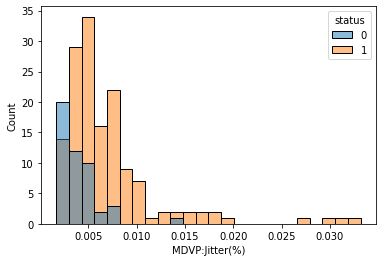

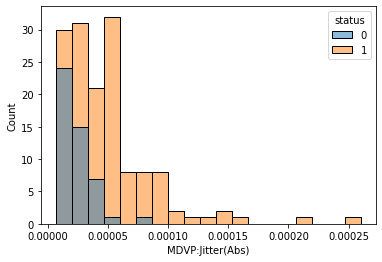

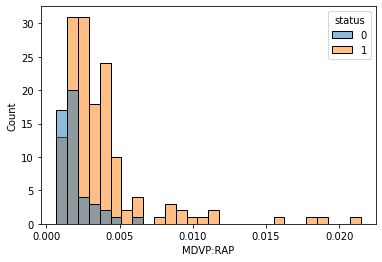

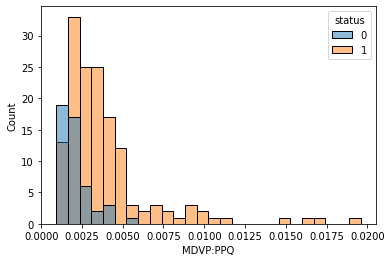

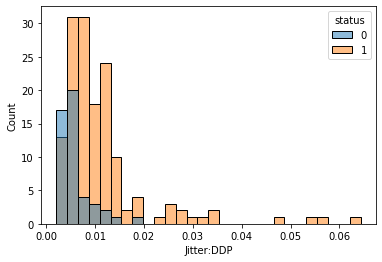

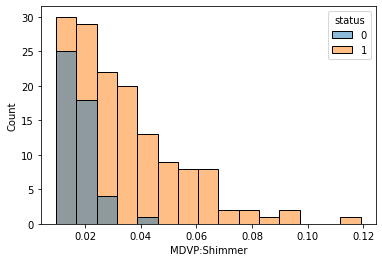

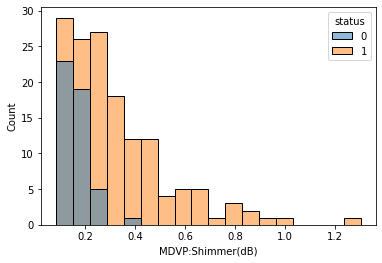

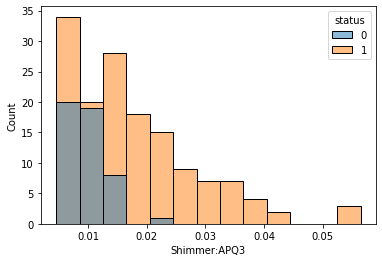

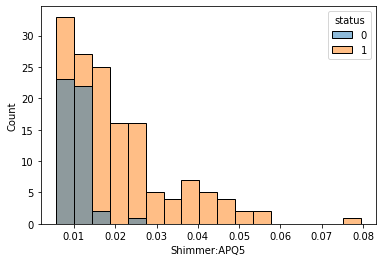

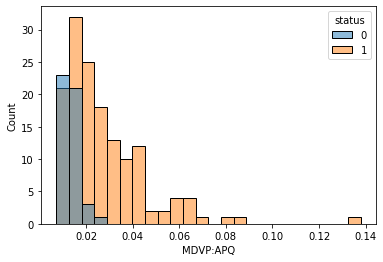

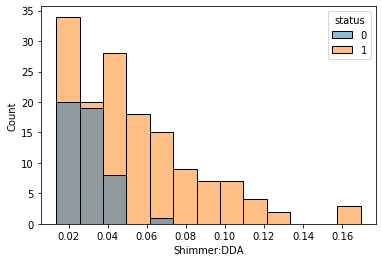

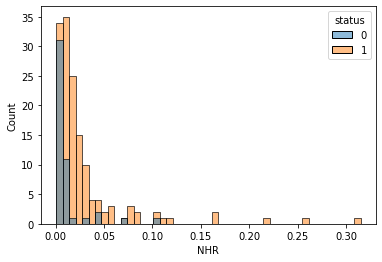

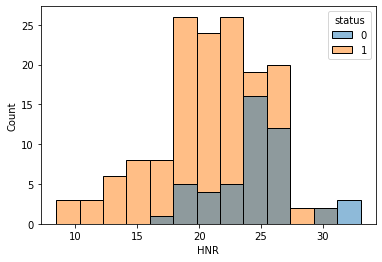

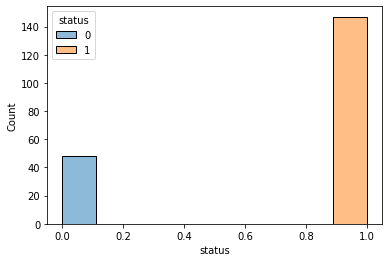

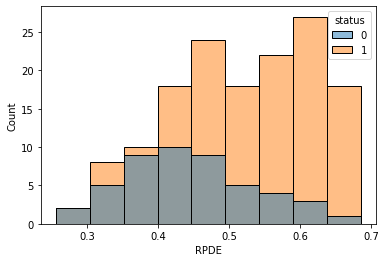

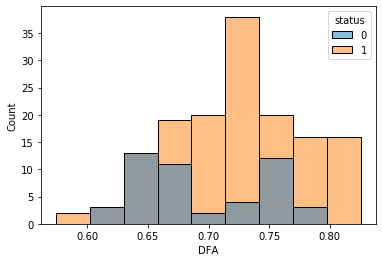

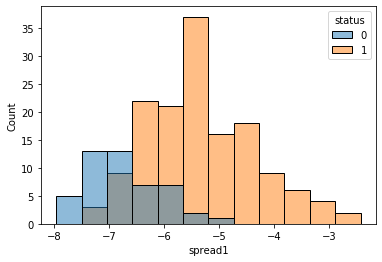

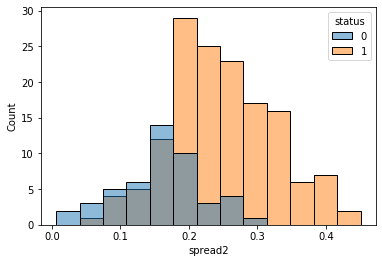

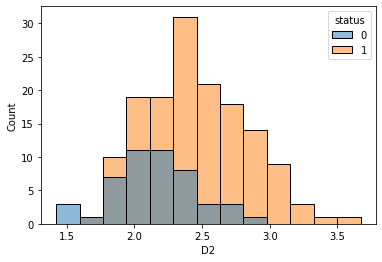

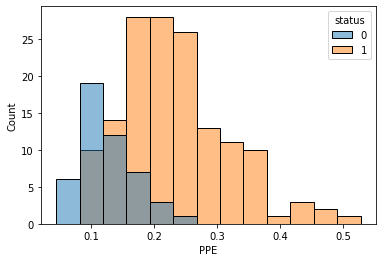

In [607]:
for col in cols:
    sns.histplot(data=data,x=col,hue='status')
    plt.show()

In [ ]:
i)The count of those affected by Parkinsons Disease is more at lower ranges of average vocal fundamental frequency(MDVP:Fo(Hz)),which is also the same trend followed in the case of Maximum vocal fundamental frequency and Minimum vocal fundamental frequency as well. The distributions are left skewed,i.e the recordings of most of the participants are concentrated to the left.
ii) The distributions of the measure of variations in frequency recordings(Jitter %,Jitter(abs),Jitter DDP,etc.MDVP RAP,MDVP PPQ) are found to be the same, wherein the count of those affected is higher for most ranges except in initial ranges. These distributions are left skewed as well.
iii)The amplitude variations are left skewed where most participants are found to have vocal amplitudes at lower ranges. Participants who do not have the disease are found to have very low amplitude values.
iv) The HNR and NHR ratios are inversely related which is expected. The count of those with parkinsons is found to be high in the middle ranges in the HNR distribution. The HNR distribution is also found to follow a normal distribution.
v) In the case of the RPDE Column data,the participants with no parkinsons disease(status=0) is found to follow a normal distribution while the count of those with parkinsons disease is more evenly distibuted towards the right.
vi) The distributions of rest of the attributes are almost normally distributed.


In [ ]:
Checking for the presence of outliers:

MDVP:Fo(Hz)


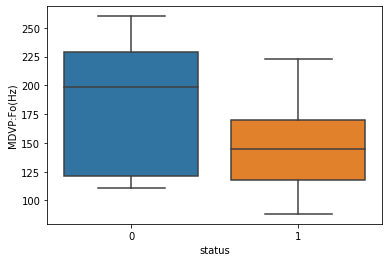

MDVP:Fhi(Hz)


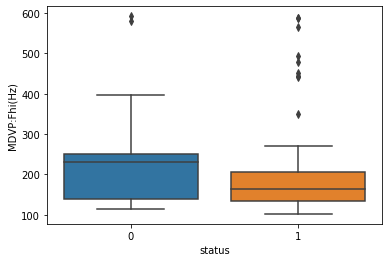

MDVP:Flo(Hz)


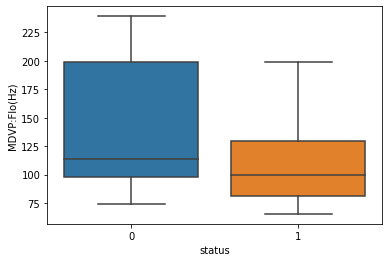

MDVP:Jitter(%)


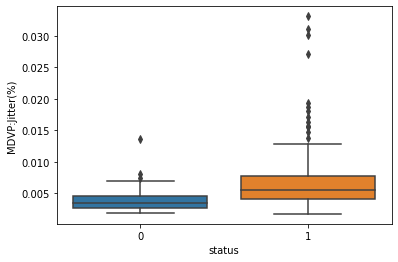

MDVP:Jitter(Abs)


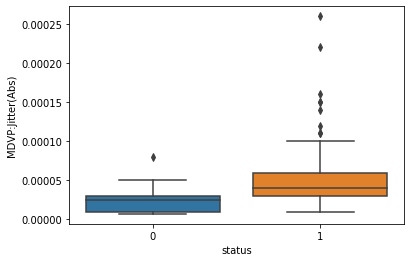

MDVP:RAP


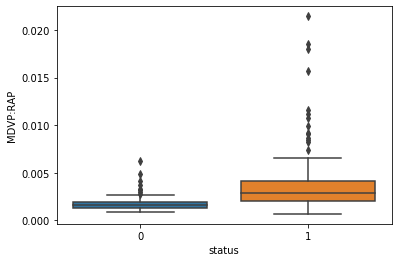

MDVP:PPQ


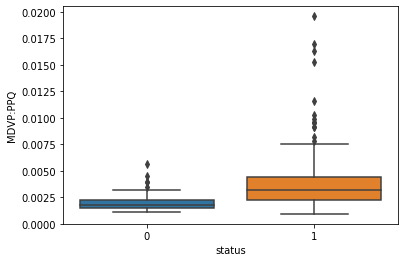

Jitter:DDP


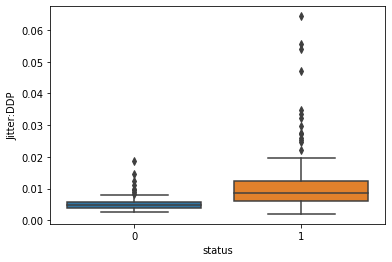

MDVP:Shimmer


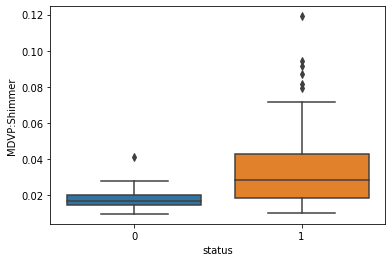

MDVP:Shimmer(dB)


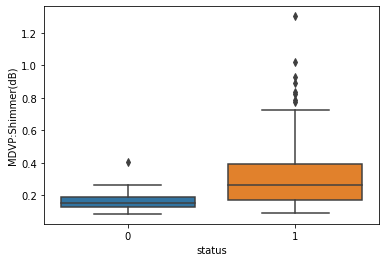

Shimmer:APQ3


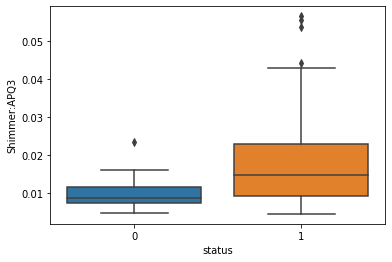

Shimmer:APQ5


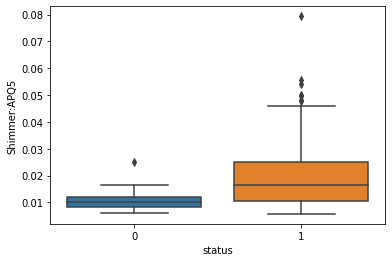

MDVP:APQ


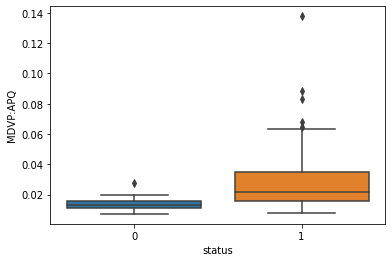

Shimmer:DDA


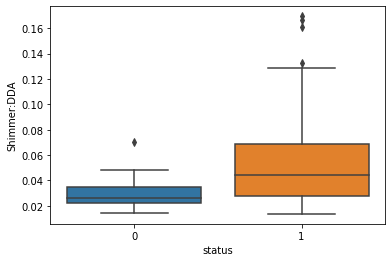

NHR


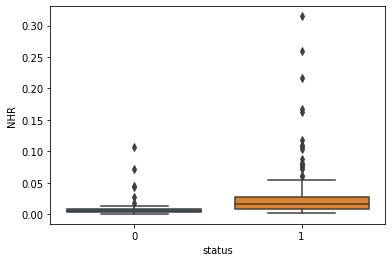

HNR


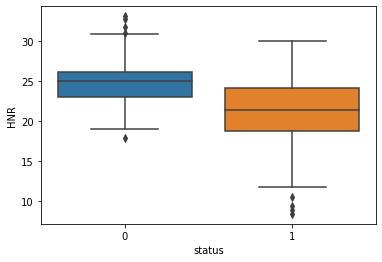

status


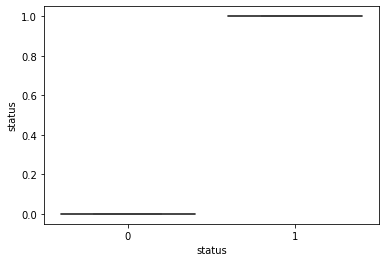

RPDE


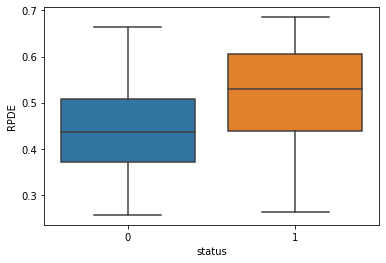

DFA


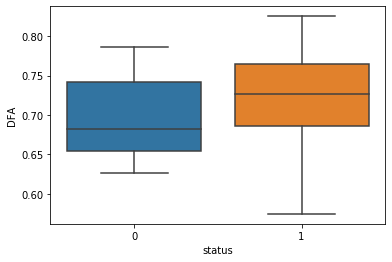

spread1


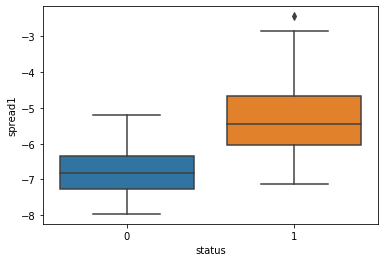

spread2


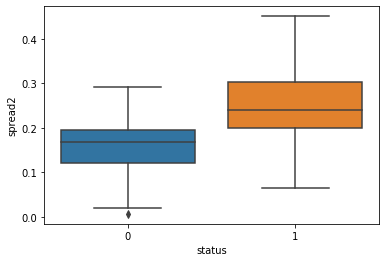

D2


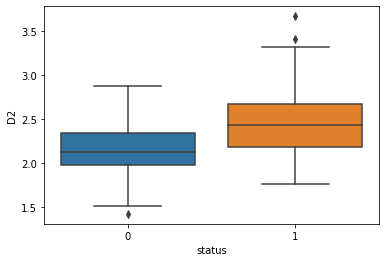

PPE


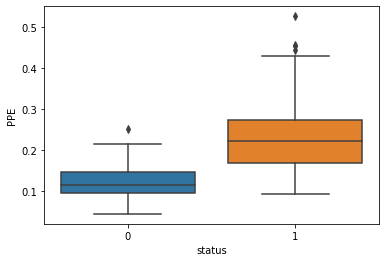

In [610]:
for col in cols:
    print(col)
    sns.boxplot(x='status',y=data[col],data=data)
    plt.show()

In [ ]:
There are many columns which are found to have outliers.The distribution of those with the disease is more uniform in all cases. 
The outliers may hold relevance to this dataset and due to the presence of very little data, the outliers will not be removed.

In [ ]:
Obtaining the correlation between different variables:

In [6]:
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm')

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [ ]:
Filtering out the variables with correlation coefficient greater than 0.9.(highly correlated variables):

In [460]:
corr=data.corr()
kot = corr[corr>=.9]
kot


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Fhi(Hz),NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Flo(Hz),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Jitter(%),NaN,NaN,NaN,1.000000,0.935714,0.990276,0.974256,0.990276,NaN,NaN,...,NaN,0.906959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Jitter(Abs),NaN,NaN,NaN,0.935714,1.000000,0.922911,NaN,0.922913,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:RAP,NaN,NaN,NaN,0.990276,0.922911,1.000000,0.957317,1.000000,NaN,NaN,...,NaN,0.919521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:PPQ,NaN,NaN,NaN,0.974256,NaN,0.957317,1.000000,0.957319,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jitter:DDP,NaN,NaN,NaN,0.990276,0.922913,1.000000,0.957319,1.000000,NaN,NaN,...,NaN,0.919548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Shimmer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.987258,...,0.987626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Shimmer(dB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.987258,1.000000,...,0.963202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
From the above data it is seen that the attributes belonging to the frequency and amplitude variations are highly correlated with each other. In this dataset, all features are kept except the name column since they may hold relevance in the prediction of the data.

In [ ]:
5) Preparing the data and splitting in the ratio of 70%:30%
    Since data is highly skewed with different ranges and units of measurement in different columns, it is first standartdize so as to bring about a normal distribution along with z-score values for data present in all columns.
    The 'name' column is removed from the input training data due to its lack of relevance to the prediction of the outcome.

In [424]:
x=data.drop(columns=['name','status'])
XScaled  = x.apply(zscore)  # convert all attributes to Z scale 

In [425]:
y=data['status']
x_train,x_test,y_train,y_test=train_test_split(XScaled,y,test_size=0.3,random_state=42)

In [ ]:
6) The data is trained using the following classification algorithms:
    i)Logistic Regression
    ii)K-Nearest Neighboring 
    iii)Support Vector Machine Classifier
    iv)Decision Tree Classifier

In [ ]:
i)Training using logistic regression:

In [678]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_predict1=model.predict_proba(x_test)


In [ ]:
Obtaining the accuracy score,confusion matrix,classification report and ROC_AUC score:

In [679]:
acc=accuracy_score(y_test,y_predict)
acc

0.864406779661017

In [628]:
print('Confusion Matrix\n',confusion_matrix(y_test,y_predict),'\n')
print('CLassification Report\n',classification_report(y_test, y_predict))

Confusion Matrix
 [[ 9  6]
 [ 2 42]] 

CLassification Report
               precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.88      0.95      0.91        44

    accuracy                           0.86        59
   macro avg       0.85      0.78      0.80        59
weighted avg       0.86      0.86      0.86        59



0.7772727272727272


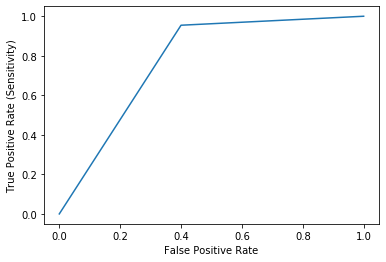

In [630]:
from sklearn.metrics import roc_curve,auc
y_predict1=model.predict_proba(x_test
fpr,tpr,threshold=roc_curve(y_test,y_predict)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

0.8924242424242423


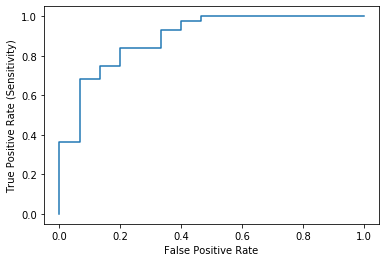

In [632]:
fpr,tpr,threshold=roc_curve(y_test,y_predict1[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
Observations:
i) An Accuracy of 86.44% is obtained on the test data.
ii)The F1 Score is less for y=0 while it is high for y=1.
iii) The areas under the curve for the target outcomes and the probability of target outcomes are found to be 0.77 and 0.89 respectively.

In [ ]:
ii) Using K-Nearest Neighbors Classifier:

In [ ]:
Finding the optimal k value:

Text(0, 0.5, 'Error Rate')

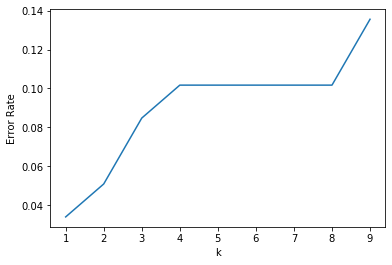

In [622]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.plot(range(1,10),error_rate)
plt.xlabel('k')
plt.ylabel('Error Rate')

In [ ]:
Since the error keeps increasing with increase in k value, we fix the minimal value of k=1.

In [ ]:
Training the KNN Classifier and generating the accuracy,confusion matrix,classification report and the AUC:

In [675]:
model=KNeighborsClassifier(n_neighbors=1,weights='distance')
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
acc=accuracy_score(y_test,y_predict)
acc

0.9661016949152542

In [676]:
print('Confusion Matrix\n',confusion_matrix(y_test,y_predict),'\n')
print('CLassification Report\n',classification_report(y_test, y_predict))

Confusion Matrix
 [[15  0]
 [ 2 42]] 

CLassification Report
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.95      0.98        44

    accuracy                           0.97        59
   macro avg       0.94      0.98      0.96        59
weighted avg       0.97      0.97      0.97        59



0.9772727272727273


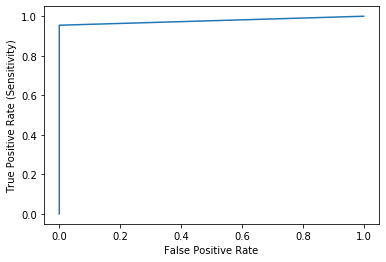

0.9772727272727273


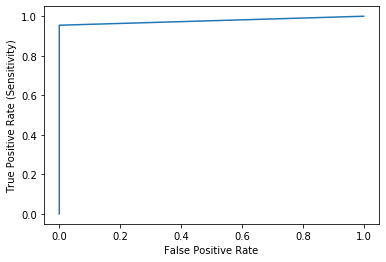

In [677]:
y_predict1=model.predict_proba(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_predict)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
fpr,tpr,threshold=roc_curve(y_test,y_predict1[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()                               
                               

In [ ]:
Observations:
    i)The accuracy is found to be 96.61%
    ii) The F1 score for both y=0 and y=1 are found to be 0.94 and 0.98 respectively.
    iii)The AUC is found to be 97.72% for the target outcomes and probability of the target outcomes.
    iv)The above classifier may have overfit the dataset.


In [ ]:
iii) Training the dataset using SVM Classifier:
    An initial value of 0.01 is assigned to the gamma parameter and 100 to the C parameter using the rbf kernel.

In [638]:
clf = SVC(gamma=0.01, C=100,kernel='rbf',probability=True) 
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
acc=accuracy_score(y_test,y_predict)
acc

0.9661016949152542

In [615]:
print('Confusion Matrix\n',confusion_matrix(y_test,y_predict),'\n')
print('CLassification Report\n',classification_report(y_test, y_predict))

Confusion Matrix
 [[13  2]
 [ 0 44]] 

CLassification Report
               precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.96      1.00      0.98        44

    accuracy                           0.97        59
   macro avg       0.98      0.93      0.95        59
weighted avg       0.97      0.97      0.97        59



0.9333333333333333


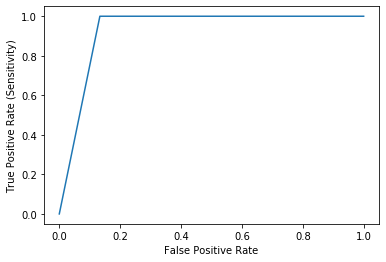

0.9742424242424242


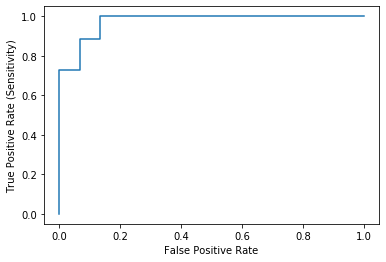

In [639]:
y_predict1=clf.predict_proba(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_predict)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
fpr,tpr,threshold=roc_curve(y_test,y_predict1[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()  

In [ ]:
Although the above SVM Classifier results in high F1 Scores and high AUC scores, a gridsearch optimization is carried out to find the optimal parameters which may help in obtaining a more generalized classifier.

In [596]:
from sklearn.metrics import f1_score, make_scorer
mdl = SVC( random_state = 1)
acc=accuracy_score(y_test,y_pred)
grid_list = {"C": [1,10,100,1000],
             "gamma":[0.001,0.01,0.1,1],
            "kernel":['linear','poly','rbf']}
 
grid_search = GridSearchCV(mdl, param_grid = grid_list, cv = 3,scoring='f1') 
grid_search.fit(x_train, y_train) 
#grid_search.cv_results_
grid_search.best_estimator_

SVC(C=1000, gamma=0.01, random_state=1)

In [ ]:
The F1 Score is used as the basis of evaluation and the optimal parameters obtained are C=1000 and gamma=0.01. In the medical datasets,high penalization value(C Parameter) is more useful.

In [ ]:
Training using the optimal parameters and obtaining the accuracy,confusion matrix,classification report and AUC scores:

In [647]:
clf = SVC(gamma=0.01, C=1000,kernel='rbf',probability=True) 
clf.fit(x_train, y_train)


SVC(C=1000, gamma=0.01, probability=True)

In [648]:
y_predict = clf.predict(x_test)
acc=accuracy_score(y_test,y_predict)
acc

0.9322033898305084

In [649]:
print('Confusion Matrix\n',confusion_matrix(y_test,y_predict),'\n')
print('CLassification Report\n',classification_report(y_test, y_predict))

Confusion Matrix
 [[11  4]
 [ 0 44]] 

CLassification Report
               precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.92      1.00      0.96        44

    accuracy                           0.93        59
   macro avg       0.96      0.87      0.90        59
weighted avg       0.94      0.93      0.93        59



0.8666666666666667


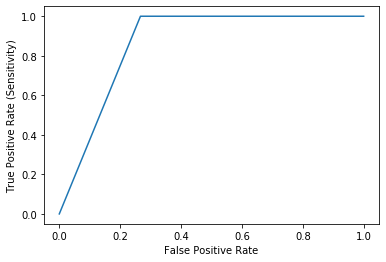

0.990909090909091


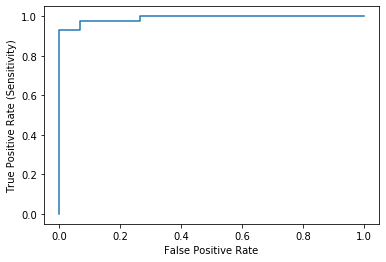

In [650]:
y_predict1=clf.predict_proba(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_predict)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
fpr,tpr,threshold=roc_curve(y_test,y_predict1[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show() 

In [ ]:
Observations:
    i)The accuracy is found to be 93.22%
    ii) The F1 score for both y=0 and y=1 are found to be 0.85 and 0.96 respectively.
    iii)The AUC is found to be 86.66% for the target outcomes and 99.09% for the probability of the target outcomes.
    


In [ ]:
iv)Training using Decision Tree Classifier:
    The entropy criterion is used as the measure of impurity while random splitter is used to obtain a more general classifier.

In [651]:
model=DecisionTreeClassifier(criterion = 'entropy',splitter='random',max_depth=10,min_samples_split=2,min_samples_leaf=1, random_state=1)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1,
                       splitter='random')

In [ ]:
Obtaining the accuracy,confusion matrix, classification report and AUC scores:

In [652]:
y_predict = model.predict(x_test)
acc=accuracy_score(y_test,y_predict)
acc

0.9322033898305084

In [653]:
print('Confusion Matrix\n',confusion_matrix(y_test,y_predict),'\n')
print('CLassification Report\n',classification_report(y_test, y_predict))

Confusion Matrix
 [[12  3]
 [ 1 43]] 

CLassification Report
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59



0.8886363636363638


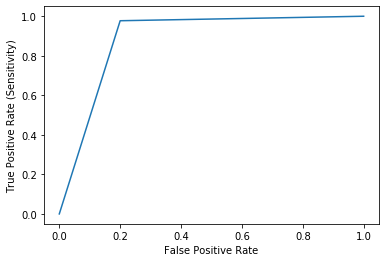

0.990909090909091


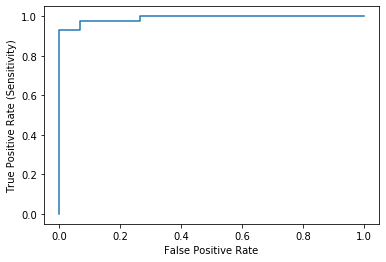

In [654]:
y_predict1=clf.predict_proba(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_predict)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
fpr,tpr,threshold=roc_curve(y_test,y_predict1[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show() 

In [ ]:
Observations:
    i)The accuracy is found to be 93.22%
    ii) The F1 score for both y=0 and y=1 are found to be 0.86 and 0.96 respectively.
    iii)The AUC is found to be 88.86% for the target outcomes and 99.09% for the probability of the target outcomes.

In [ ]:
7)Training a meta classifier and obtaining the test accuracy:
    Here the StackingClassifier from sklearn is used with the logistic regression,KNN,Decision Tree,SVM and Gaussian NB as the base estimators and SVM as the final estimator.

In [695]:
from sklearn.ensemble import StackingClassifier
estimators=[]
estimators.append(('lr', LogisticRegression()))
estimators.append(('knn', KNeighborsClassifier(n_neighbors=1)))
estimators.append(('cart', DecisionTreeClassifier()))
estimators.append(('svm', SVC(C=1000)))
estimators.append(('bayes', GaussianNB()))
final =SVC(gamma=0.01,C=1000,kernel='rbf',probability=True)
model = StackingClassifier(estimators=estimators, final_estimator=final)
# fit the model on all available data
model.fit(x_train, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier(n_neighbors=1)),
                               ('cart', DecisionTreeClassifier()),
                               ('svm', SVC(C=1000)), ('bayes', GaussianNB())],
                   final_estimator=SVC(C=1000, gamma=0.01, probability=True))

In [ ]:
Obtaining the accuracy,confusion matrix,classification report and AUC Scores:

In [696]:
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

0.9830508474576272

In [697]:
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred),'\n')
print(classification_report(y_test, y_pred))

Confusion Matrix
 [[14  1]
 [ 0 44]] 

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.98      1.00      0.99        44

    accuracy                           0.98        59
   macro avg       0.99      0.97      0.98        59
weighted avg       0.98      0.98      0.98        59



0.9666666666666667


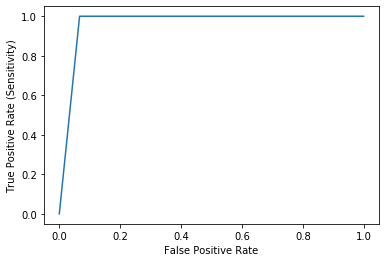

0.9984848484848485


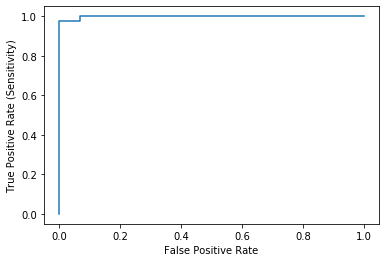

In [698]:
y_predict1=model.predict_proba(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
fpr,tpr,threshold=roc_curve(y_test,y_predict1[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show() 

In [ ]:
Observations:
    i)The accuracy is found to be 98.3%
    ii) The F1 score for both y=0 and y=1 are found to be 0.97 and 0.99 respectively.
    iii)The AUC is found to be 96.66% for the target outcomes and 99.84% for the probability of the target outcomes.
    

In [ ]:
8)Training using ensemble models:
    i)Random Forest Classifier
    ii)Adaboost Classifier
    iii)Bagging Classifier

In [ ]:
i)Training using Random Forest Classifier:
    The number of decision trees used for estimation is 10 and the maximum number of features used for splitting and decision making is 6.

In [661]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, random_state=1,max_features=6)
model.fit(x_train, y_train)

RandomForestClassifier(max_features=6, n_estimators=10, random_state=1)

In [662]:
y_predict = model.predict(x_test)

In [ ]:
Obtaining the accuracy,confusion matrix,classification report and AUC Scores:

In [663]:
acc=accuracy_score(y_test,y_predict)
acc

0.9322033898305084

In [664]:
print('Confusion Matrix\n',confusion_matrix(y_test,y_predict),'\n')
print(classification_report(y_test, y_predict))

Confusion Matrix
 [[12  3]
 [ 1 43]] 

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59



0.8886363636363638


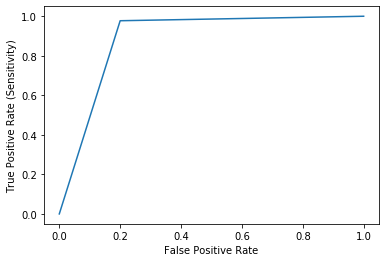

0.9272727272727274


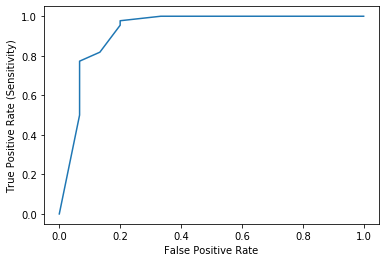

In [666]:
y_predict1=model.predict_proba(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_predict)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
fpr,tpr,threshold=roc_curve(y_test,y_predict1[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show() 

In [ ]:
Observations:
    i)The accuracy is found to be 93.22%
    ii) The F1 score for both y=0 and y=1 are found to be 0.86 and 0.96 respectively.
    iii)The AUC is found to be 88.86% for the target outcomes and 92.72% for the probability of the target outcomes.

In [ ]:
ii)Training using Adaboost Classifier:

In [699]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=100, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, y_train)

In [700]:
y_predict = abcl.predict(x_test)

In [701]:
acc=accuracy_score(y_test,y_predict)
acc

0.9152542372881356

In [702]:
print('Confusion Matrix\n',confusion_matrix(y_test,y_predict),'\n')
print(classification_report(y_test, y_predict))

Confusion Matrix
 [[10  5]
 [ 0 44]] 

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.90      1.00      0.95        44

    accuracy                           0.92        59
   macro avg       0.95      0.83      0.87        59
weighted avg       0.92      0.92      0.91        59



0.8333333333333334


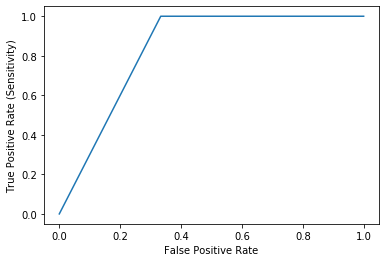

0.9681818181818183


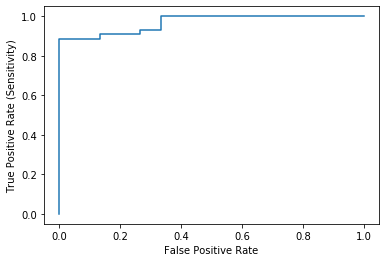

In [670]:
y_predict1=abcl.predict_proba(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_predict)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
fpr,tpr,threshold=roc_curve(y_test,y_predict1[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
Observations:
    i)The accuracy is found to be 91.525%
    ii) The F1 score for both y=0 and y=1 are found to be 0.80 and 0.95 respectively.
    iii)The AUC is found to be 83.33% for the target outcomes and 96.81% for the probability of the target outcomes.

In [ ]:
iii)Training using Bagging Classifier:

In [703]:
from sklearn.ensemble import BaggingClassifier
cart=DecisionTreeClassifier(criterion = 'entropy',splitter='random',max_depth=10,min_samples_split=2,min_samples_leaf=1, random_state=42)
model = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=42)


In [704]:
model.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=10,
                                                        random_state=42,
                                                        splitter='random'),
                  n_estimators=100, random_state=42)

In [ ]:
Obtaining the accuracy,confusion matrix,classification report and AUC scores:

In [705]:
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

0.9322033898305084

In [706]:
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred),'\n')
print(classification_report(y_test, y_pred))

Confusion Matrix
 [[12  3]
 [ 1 43]] 

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59



0.8886363636363638


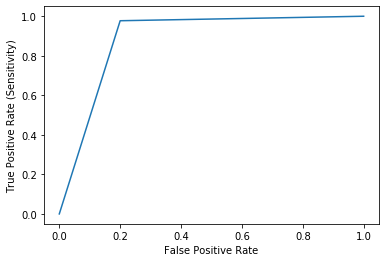

0.9742424242424242


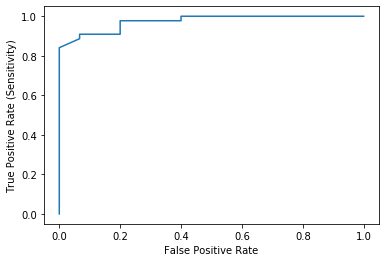

In [674]:
y_predict1=model.predict_proba(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
fpr,tpr,threshold=roc_curve(y_test,y_predict1[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
Observations:
    i)The accuracy is found to be 93.22%
    ii) The F1 score for both y=0 and y=1 are found to be 0.86 and 0.96 respectively.
    iii)The AUC is found to be 88.86% for the target outcomes and 97.42% for the probability of the target outcomes.

In [ ]:
9) Comparison of Models

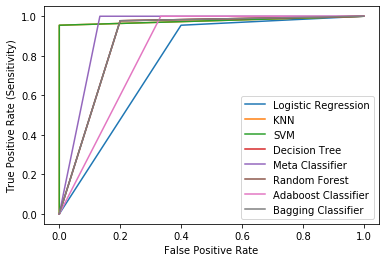

In [708]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_predict)
roc_auc=auc(fpr,tpr)
plt.plot(fpr, tpr,label='Logistic Regression')

model=KNeighborsClassifier(n_neighbors=1,weights='distance')
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_predict)
roc_auc=auc(fpr,tpr)
plt.plot(fpr, tpr,label='KNN')

y_predict = clf.predict(x_test)
y_predict = model.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_predict)
roc_auc=auc(fpr,tpr)
plt.plot(fpr, tpr,label='SVM')

model=DecisionTreeClassifier(criterion = 'entropy',splitter='random',max_depth=10,min_samples_split=2,min_samples_leaf=1, random_state=1)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_predict)
roc_auc=auc(fpr,tpr)
plt.plot(fpr, tpr,label='Decision Tree')

model = StackingClassifier(estimators=estimators, final_estimator=final)
# fit the model on all available data
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_predict)
roc_auc=auc(fpr,tpr)
plt.plot(fpr, tpr,label='Meta Classifier')

model = RandomForestClassifier(n_estimators = 10, random_state=1,max_features=6)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_predict)
roc_auc=auc(fpr,tpr)
plt.plot(fpr, tpr,label='Random Forest')

y_predict = abcl.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_predict)
roc_auc=auc(fpr,tpr)
plt.plot(fpr, tpr,label='Adaboost Classifier')

model = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_predict)
roc_auc=auc(fpr,tpr)
plt.plot(fpr, tpr,label='Bagging Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()

In [ ]:
From the above plot, it can be seen that the AUC of many models is the same value while the Meta CLassifier has the maximum AUC.
It can be concluded that the Meta Classifier has the best performance while Random Forest performs the best among the ensemble models.
There are several models that yield 0 False Negatives and none of the models give 0 False Positives. Since the meta classifier yields the least amount of false positives and negatives and has the highest AUC, it can be chosen as the preferred model.